# Simple Neural Network with weight update using core python.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Here we are declaring the dataframe which defines the operations of OR function, where 1 is returned for either x1 or x2 being true or both being true, but 0 when both are FALSE. 

In [96]:
OR = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,1,1,1)})
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


Below scatter plot shows how the OR function operates. Output(y) is 1 when either x1 or x2 is 1 or both as 1 and 0 otherwise.

Text(0.5, 1.0, 'Scatter plot - OR function')

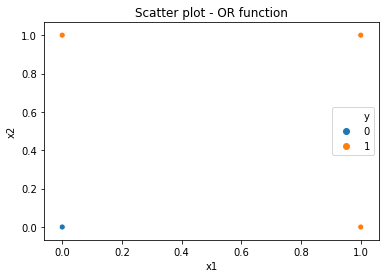

In [98]:
sns.scatterplot(x='x1',y='x2',hue='y',data=OR)
plt.title("Scatter plot - OR function")

Let's split the dataframe into inputs and target.

In [148]:
inputs = OR.iloc[:,:2]
target = OR.iloc[:,2]

A simple activation function is defined as below where 1 is returned if matrix multiplication of inputs and weight is greater than 0 and returns 0 when otherwise.

In [150]:
act_func = lambda inputs,weight: np.where(np.dot(inputs,weight)>0,1,0)

We have created a training function that iterates the learning algorithm, returning the adapted weights. We are passing inputs, output, weight, learning rate(eta) and no of iterations(n_iterations). 

**Step 1** - We are concatenating the bias. Here we are using -np.ones((len(inputs),1)) to define bias which returns array of 1 with the specified size. 

**Step 2** - We are iterating through the 'for' loop. Within the loop, we are calling the activation function (act_func) which returns array of 1 or 0. Then weight is re-calculated based on the difference between activation function and actual output. We use learning rate(eta) and -=(subtraction assignment operator) to subtract **old weight and eta*np.dot(np.transpose(inputs),(activation-output))** to calculate new weight. 

**Step 3** - Weights at the last iteration is returned.

In [207]:
def neural_network(inputs,output,weight,eta,n_iterations):
    
    #adding bias
    inputs = np.c_[inputs,-np.ones((len(inputs),1))]
    
    for i in range(n_iterations):
        activation = act_func(inputs,weight)
        weight -= eta*np.dot(np.transpose(inputs),activation-output)
        print("Iteration - {} | Weight - {} | Prediction - {}".format(i,weight,activation))
        
    return (weight) 


Random weight is defined as below.

In [204]:
weight = np.random.randn(3)*1e-4
weight

array([-1.06999634e-05, -1.19275745e-04,  7.07145389e-05])

Let's call the function by providing the inputs, target, weight, learning rate(eta) and no of iteration(n_iteration) as parameters.

Check out the result. The loop has run for 10 iterations as provided by in the parameter but the **prediction** converged with **target** in **iteration 4** and after that, the weight has remained constant

In [205]:
eta = 0.3
n_iterations=10

weight= neural_network(inputs, target, weight, eta, n_iterations)

Iteration - 0 | Weight - [ 0.5999893   0.59988072 -0.89992929] | Prediction - [0 0 0 0]
Iteration - 1 | Weight - [ 0.5999893   0.59988072 -0.59992929] | Prediction - [1 1 1 1]
Iteration - 2 | Weight - [ 0.5999893   0.59988072 -0.29992929] | Prediction - [1 1 1 1]
Iteration - 3 | Weight - [5.99989300e-01 5.99880724e-01 7.07145389e-05] | Prediction - [1 1 1 1]
Iteration - 4 | Weight - [5.99989300e-01 5.99880724e-01 7.07145389e-05] | Prediction - [0 1 1 1]
Iteration - 5 | Weight - [5.99989300e-01 5.99880724e-01 7.07145389e-05] | Prediction - [0 1 1 1]
Iteration - 6 | Weight - [5.99989300e-01 5.99880724e-01 7.07145389e-05] | Prediction - [0 1 1 1]
Iteration - 7 | Weight - [5.99989300e-01 5.99880724e-01 7.07145389e-05] | Prediction - [0 1 1 1]
Iteration - 8 | Weight - [5.99989300e-01 5.99880724e-01 7.07145389e-05] | Prediction - [0 1 1 1]
Iteration - 9 | Weight - [5.99989300e-01 5.99880724e-01 7.07145389e-05] | Prediction - [0 1 1 1]


# Performance of the network based on learning rate

Let's now play with the learning rate to understand how it impacts the number of iteration and time taken to arrive at the correct prediction. For this, we will modify the function a bit to track the time taken to complete and break out of the loop when the prediction has matched the target.

In the below function, we have added an 'if' clause to check if the activation and actual output have any difference. If not, it would break the for loop. 

Here we are importing default_timer from timeit to track how much time is elapsed in the process. 

In [216]:
from timeit import default_timer as timer 

def neural_network_performance(inputs,output,weight,eta,n_iterations):
    start = timer()
    #adding bias
    inputs = np.c_[inputs,-np.ones((len(inputs),1))]
    
    for i in range(n_iterations):
        activation = act_func(inputs,weight)
        weight -= eta*np.dot(np.transpose(inputs),activation-output)
        print("Iteration - {} | Weight - {} | Prediction - {}".format(i,weight,activation))
        ch = eta*np.dot(np.transpose(inputs),activation-output)
        if(np.any(ch)==False):
            break
    end = timer()
    print("Time elapsed : ",end-start," seconds")
    return (weight) 


In [261]:
weight = np.random.randn(3)*1e-4
weight

array([ 1.04445773e-04, -2.42998759e-05,  1.42022470e-04])

Let's try having learning rate as 0.3 and check the performance. The prediction values converge with the actual target in Iteration - 2. The time elapsed is 0.0066 seconds.

In [218]:
eta = 0.3
n_iterations=10

weight= neural_network_performance(inputs, target, weight, eta, n_iterations)

Iteration - 0 | Weight - [ 1.29255964e-04  2.99952669e-01 -2.99981845e-01] | Prediction - [0 0 1 1]
Iteration - 1 | Weight - [1.29255964e-04 2.99952669e-01 1.81550365e-05] | Prediction - [1 1 1 1]
Iteration - 2 | Weight - [1.29255964e-04 2.99952669e-01 1.81550365e-05] | Prediction - [0 1 1 1]
Time elapsed :  0.0066426999983377755  seconds


Let's try having learning rate as 10 and check the performance. The prediction values converge with the actual target in Iteration - 5. The time elapsed is 0.0118 seconds.

In [262]:
eta = 10
n_iterations=500

weight= neural_network_performance(inputs, target, weight, eta, n_iterations)

Iteration - 0 | Weight - [ 20.00010445  19.9999757  -29.99985798] | Prediction - [0 0 0 0]
Iteration - 1 | Weight - [ 20.00010445  19.9999757  -19.99985798] | Prediction - [1 1 1 1]
Iteration - 2 | Weight - [20.00010445 19.9999757  -9.99985798] | Prediction - [1 1 1 1]
Iteration - 3 | Weight - [2.00001044e+01 1.99999757e+01 1.42022470e-04] | Prediction - [1 1 1 1]
Iteration - 4 | Weight - [2.00001044e+01 1.99999757e+01 1.42022470e-04] | Prediction - [0 1 1 1]
Time elapsed :  0.011881200000061654  seconds


Now let's try having learning rate as 0.0000001 and check the performance. The prediction values converge with the actual target in **Iteration - 397**. The time elapsed is **0.5972 seconds**.

In [236]:
eta = 0.0000001
n_iterations=500

weight= neural_network_performance(inputs, target, weight, eta, n_iterations)

Iteration - 0 | Weight - [2.08786600e-04 4.23400728e-05 1.21461164e-04] | Prediction - [0 0 1 1]
Iteration - 1 | Weight - [2.08786600e-04 4.24400728e-05 1.21361164e-04] | Prediction - [0 0 1 1]
Iteration - 2 | Weight - [2.08786600e-04 4.25400728e-05 1.21261164e-04] | Prediction - [0 0 1 1]
Iteration - 3 | Weight - [2.08786600e-04 4.26400728e-05 1.21161164e-04] | Prediction - [0 0 1 1]
Iteration - 4 | Weight - [2.08786600e-04 4.27400728e-05 1.21061164e-04] | Prediction - [0 0 1 1]
Iteration - 5 | Weight - [2.08786600e-04 4.28400728e-05 1.20961164e-04] | Prediction - [0 0 1 1]
Iteration - 6 | Weight - [2.08786600e-04 4.29400728e-05 1.20861164e-04] | Prediction - [0 0 1 1]
Iteration - 7 | Weight - [2.08786600e-04 4.30400728e-05 1.20761164e-04] | Prediction - [0 0 1 1]
Iteration - 8 | Weight - [2.08786600e-04 4.31400728e-05 1.20661164e-04] | Prediction - [0 0 1 1]
Iteration - 9 | Weight - [2.08786600e-04 4.32400728e-05 1.20561164e-04] | Prediction - [0 0 1 1]
Iteration - 10 | Weight - [2.0

# Summary

Thus we have created a simple neural network with weight update using core python. Also, we have seen how the learning rate has impacted the convergence of prediction and target observations. Too big a learning rate or too low a learning rate, both would affect the performance of the neural network. Typical learning rates are in the 0.1–0.4 range.

Lets try the same with AND function. The AND function returns 1 if both are true, or zero otherwise.

In [158]:
AND = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,0,0,1)})
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [163]:
inputs_AND = AND.iloc[:,:2]
target_AND = AND.iloc[:,2]

In [263]:
weight = np.random.randn(3)*1e-4
weight

array([ 1.22959331e-05, -6.87192128e-06, -9.73816903e-05])

In [264]:
eta = 0.25
n_iterations=20

weight= neural_network_performance(inputs_AND, target_AND, weight, eta, n_iterations)

Iteration - 0 | Weight - [-0.2499877  -0.25000687  0.74990262] | Prediction - [1 1 1 1]
Iteration - 1 | Weight - [ 1.22959331e-05 -6.87192128e-06  4.99902618e-01] | Prediction - [0 0 0 0]
Iteration - 2 | Weight - [0.2500123  0.24999313 0.24990262] | Prediction - [0 0 0 0]
Iteration - 3 | Weight - [ 1.22959331e-05 -6.87192128e-06  7.49902618e-01] | Prediction - [0 1 1 1]
Iteration - 4 | Weight - [0.2500123  0.24999313 0.49990262] | Prediction - [0 0 0 0]
Iteration - 5 | Weight - [0.2500123  0.24999313 0.49990262] | Prediction - [0 0 0 1]
Time elapsed :  0.010056600000098115  seconds
